In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/02


In [2]:
files={}
files['OPT2_DRY']=R.TFile("data/OPT2/prodAnalysis_c40_OptStep2_Sep2022.root")

In [3]:
map_prod ={1:0, 5:1, 10:2}
g={}
for tag in ['OPT2_DRY']:
    for t in ['LY_arrayRms','sigmaT_arrayRms','XT_arrayRms','LY_globRms','sigmaT_globRms','XT_globRms']:
        g['%s_%s'%(t,tag)]=R.TGraphErrors(len(map_prod))

In [4]:
for tag in ['OPT2_DRY']:
    opt2_ly_histos = files['OPT2_DRY']

    ly_arrayRms_gr = opt2_ly_histos.Get('ly_arrayRms_byProd_geo2_PREIRR')
    xt_arrayRms_gr = opt2_ly_histos.Get('xt_arrayRms_byProd_geo2_PREIRR')
    sigmaT_arrayRms_gr = opt2_ly_histos.Get('sigmaT_arrayRms_byProd_geo2_PREIRR')

    ly_globRms_gr = opt2_ly_histos.Get('ly_rms_byProd_geo2_PREIRR')
    xt_globRms_gr = opt2_ly_histos.Get('xt_rms_byProd_geo2_PREIRR')
    sigmaT_globRms_gr = opt2_ly_histos.Get('sigmaT_rms_byProd_geo2_PREIRR')

    gr_map_prod ={1:0, 5:4, 10:8}
    for prod in [1,5,10]:
        iv=map_prod[prod]
        pos=iv
        
        ly_arrayRms = ly_arrayRms_gr.GetPointY(gr_map_prod[prod])
        xt_arrayRms = xt_arrayRms_gr.GetPointY(gr_map_prod[prod]) 
        sigmaT_arrayRms = sigmaT_arrayRms_gr.GetPointY(gr_map_prod[prod]) 
        
        ly_arrayRms_err = ly_arrayRms_gr.GetErrorY(gr_map_prod[prod])
        xt_arrayRms_err = xt_arrayRms_gr.GetErrorY(gr_map_prod[prod]) 
        sigmaT_arrayRms_err = sigmaT_arrayRms_gr.GetErrorY(gr_map_prod[prod]) 

        ly_globRms = ly_globRms_gr.GetPointY(gr_map_prod[prod])
        xt_globRms = xt_globRms_gr.GetPointY(gr_map_prod[prod]) 
        sigmaT_globRms = sigmaT_globRms_gr.GetPointY(gr_map_prod[prod]) 
        
        ly_globRms_err = ly_globRms_gr.GetErrorY(gr_map_prod[prod])
        xt_globRms_err = xt_globRms_gr.GetErrorY(gr_map_prod[prod]) 
        sigmaT_globRms_err = sigmaT_globRms_gr.GetErrorY(gr_map_prod[prod]) 
        
        g['LY_arrayRms_%s'%tag].SetPoint(iv,pos,ly_arrayRms)
        g['LY_arrayRms_%s'%tag].SetPointError(iv,0,ly_arrayRms_err)
        g['sigmaT_arrayRms_%s'%tag].SetPoint(iv,pos,sigmaT_arrayRms)
        g['sigmaT_arrayRms_%s'%tag].SetPointError(iv,0,sigmaT_arrayRms_err)
        g['XT_arrayRms_%s'%tag].SetPoint(iv,pos,xt_arrayRms)
        g['XT_arrayRms_%s'%tag].SetPointError(iv,0,xt_arrayRms_err)
        
        g['LY_globRms_%s'%tag].SetPoint(iv,pos+0.1,ly_globRms)
        g['LY_globRms_%s'%tag].SetPointError(iv,0,ly_globRms_err)
        g['sigmaT_globRms_%s'%tag].SetPoint(iv,pos+0.1,sigmaT_globRms)
        g['sigmaT_globRms_%s'%tag].SetPointError(iv,0,sigmaT_globRms_err)
        g['XT_globRms_%s'%tag].SetPoint(iv,pos+0.1,xt_globRms)
        g['XT_globRms_%s'%tag].SetPointError(iv,0,xt_globRms_err)
g['LY_arrayRms_OPT2_DRY'].Print()
g['LY_globRms_OPT2_DRY'].Print()

x[0]=0, y[0]=4.62657, ex[0]=0, ey[0]=0.407952
x[1]=1, y[1]=3.78524, ex[1]=0, ey[1]=0.38438
x[2]=2, y[2]=5.89579, ex[2]=0, ey[2]=0.613654
x[0]=0.1, y[0]=5.32628, ex[0]=0, ey[0]=0.410931
x[1]=1.1, y[1]=3.83768, ex[1]=0, ey[1]=0.296084
x[2]=2.1, y[2]=5.3326, ex[2]=0, ey[2]=0.421579


In [5]:
c1=R.TCanvas('c1','c1',800,600)
l=R.TLegend(0.15,0.65,0.9,0.88)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)
l.SetTextSize(0.04)

tL=R.TLatex()#pm                                                                                                                               
tL.SetTextSize(0.04)
R.gStyle.SetOptTitle(0)

In [6]:
for k in ['OPT2_DRY']:
    for h in ['LY_arrayRms','sigmaT_arrayRms','XT_arrayRms','LY_globRms','sigmaT_globRms','XT_globRms']:
        g['%s_%s'%(h,k)].GetHistogram().SetBins(3,-0.5,3-0.5)
        for kk,vendor in enumerate([1,5,10]):
            g['%s_%s'%(h,k)].GetHistogram().GetXaxis().SetBinLabel(kk+1,'prod%d'%vendor)

x[0]=0, y[0]=4.62657, ex[0]=0, ey[0]=0.407952
x[1]=1, y[1]=3.78524, ex[1]=0, ey[1]=0.38438
x[2]=2, y[2]=5.89579, ex[2]=0, ey[2]=0.613654


Info in <TCanvas::Print>: png file plots/LYSO_OPT2_LY_ARRAYRMS_DRY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT2_LY_ARRAYRMS_DRY_byProd.pdf has been created


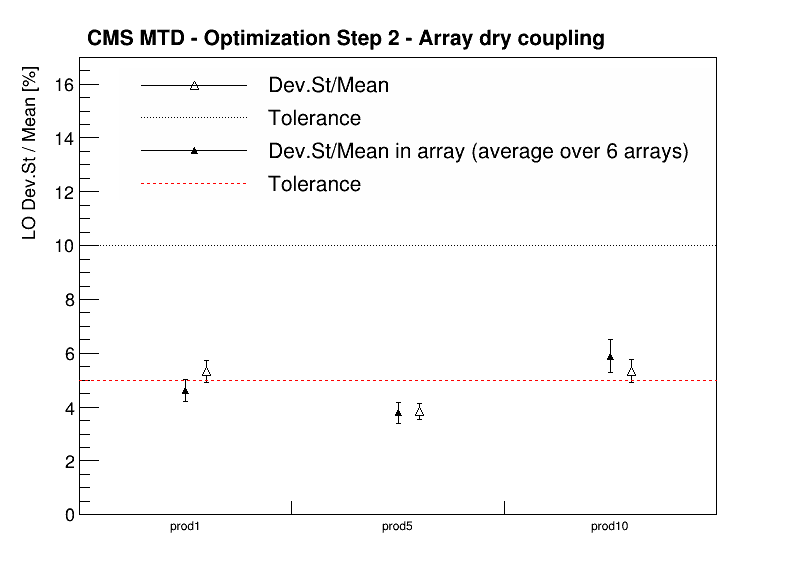

In [7]:
l.Clear()
g['LY_arrayRms_OPT2_DRY'].Print()
g['LY_arrayRms_OPT2_DRY'].Draw("AP*")
g['LY_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetLimits(0,17)
g['LY_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetRangeUser(0,17)
g['LY_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetTitle("LO Dev.St / Mean [%]")
g['LY_arrayRms_OPT2_DRY'].SetMarkerStyle(22)

g['LY_globRms_OPT2_DRY'].SetMarkerStyle(26)
g['LY_globRms_OPT2_DRY'].Draw("PSAME")

hl5 = R.TLine(-0.5,5,2.5,5)
hl5.SetLineStyle(R.kDashed)
hl5.SetLineColor(R.kRed)
hl5.Draw("SAME")

hl10 = R.TLine(-0.5,10,2.5,10)
hl10.SetLineStyle(R.kDotted)
hl10.SetLineColor(R.kBlack)
hl10.Draw("SAME")

l.AddEntry(g['LY_globRms_OPT2_DRY'],"Dev.St/Mean","PL")
l.AddEntry(hl10,"Tolerance","l")
l.AddEntry(g['LY_arrayRms_OPT2_DRY'],"Dev.St/Mean in array (average over 6 arrays)","PL")
l.AddEntry(hl5,"Tolerance","l")

l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - Optimization Step 2 - Array dry coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT2_LY_ARRAYRMS_DRY_byProd.%s'%ext)

x[0]=0, y[0]=3.11974, ex[0]=0, ey[0]=0.463607
x[1]=1, y[1]=3.95965, ex[1]=0, ey[1]=0.912748
x[2]=2, y[2]=4.52227, ex[2]=0, ey[2]=0.715579


Info in <TCanvas::Print>: png file plots/LYSO_OPT2_sigmaT_ARRAYRMS_DRY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT2_sigmaT_ARRAYRMS_DRY_byProd.pdf has been created


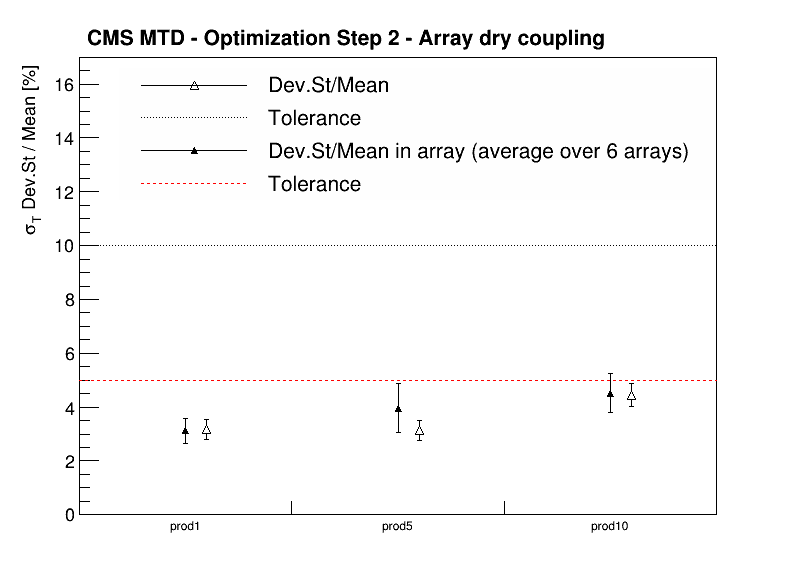

In [8]:
g['sigmaT_arrayRms_OPT2_DRY'].Print()
g['sigmaT_arrayRms_OPT2_DRY'].Draw("AP*")
g['sigmaT_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetLimits(0,17)
g['sigmaT_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetRangeUser(0,17)
g['sigmaT_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetTitle("#sigma_{T} Dev.St / Mean [%]")
g['sigmaT_arrayRms_OPT2_DRY'].SetMarkerStyle(22)

g['sigmaT_globRms_OPT2_DRY'].SetMarkerStyle(26)
g['sigmaT_globRms_OPT2_DRY'].Draw("PSAME")

hl5.Draw("SAME")
hl10.Draw("SAME")

l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - Optimization Step 2 - Array dry coupling')
c1.Draw()

for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT2_sigmaT_ARRAYRMS_DRY_byProd.%s'%ext)

x[0]=0, y[0]=2.70593, ex[0]=0, ey[0]=0.132026
x[1]=1, y[1]=2.49971, ex[1]=0, ey[1]=0.11263
x[2]=2, y[2]=2.42384, ex[2]=0, ey[2]=0.159129


Info in <TCanvas::Print>: png file plots/LYSO_OPT2_XT_ARRAYRMS_DRY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT2_XT_ARRAYRMS_DRY_byProd.pdf has been created


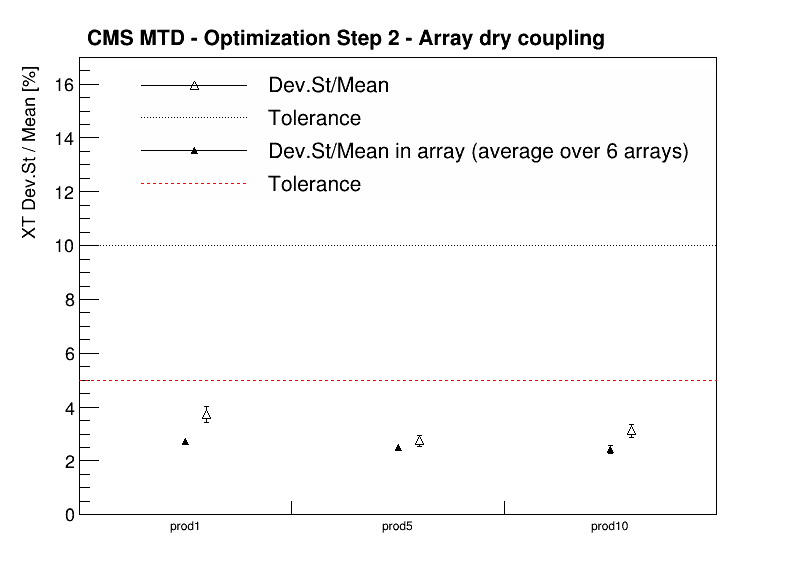

In [9]:
g['XT_arrayRms_OPT2_DRY'].Print()
g['XT_arrayRms_OPT2_DRY'].Draw("AP*")
g['XT_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetLimits(0,17)
g['XT_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetRangeUser(0,17)
g['XT_arrayRms_OPT2_DRY'].GetHistogram().GetYaxis().SetTitle("XT Dev.St / Mean [%]")
g['XT_arrayRms_OPT2_DRY'].SetMarkerStyle(22)

g['XT_globRms_OPT2_DRY'].SetMarkerStyle(26)
g['XT_globRms_OPT2_DRY'].Draw("PSAME")

hl5.Draw("SAME")
hl10.Draw("SAME")

l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - Optimization Step 2 - Array dry coupling')
c1.Draw()

for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT2_XT_ARRAYRMS_DRY_byProd.%s'%ext)